In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from datetime import date
import calendar

In [3]:
from sklearn.cluster import KMeans

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context('notebook')

In [5]:
# Data presented by hour instead of by day
DATA="C:/users/moao/desktop/bethculler_webfiles/RBA/bike-sharing-dataset/hour.csv"

In [6]:
# Convert the string dteday column into a datetime format
raw = pd.read_csv(DATA, parse_dates=['dteday'])
type(raw['dteday'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
raw.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
print(raw.shape)

(17379, 17)


In [9]:
# Clean the data: 
# remove unneeded features (instant, hum, windspeed, casual, registered, weathersit);
# rename cnt column
raw.drop(['instant', 'hum', 'windspeed', 'casual', 'registered', 'weathersit'], axis=1, inplace=True)

In [10]:
print(raw.shape)
raw.head()

(17379, 11)


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,cnt
0,2011-01-01,1,0,1,0,0,6,0,0.24,0.2879,16
1,2011-01-01,1,0,1,1,0,6,0,0.22,0.2727,40
2,2011-01-01,1,0,1,2,0,6,0,0.22,0.2727,32
3,2011-01-01,1,0,1,3,0,6,0,0.24,0.2879,13
4,2011-01-01,1,0,1,4,0,6,0,0.24,0.2879,1


In [11]:
# Validate that there are no missing values in the train dataset 
raw.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
temp          0
atemp         0
cnt           0
dtype: int64

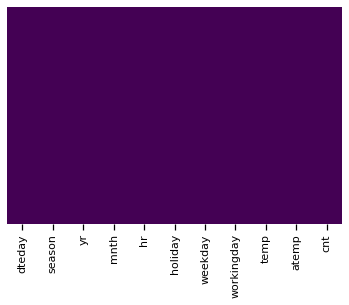

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(raw.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [13]:
plt.style.use('ggplot')

In [14]:
# Descriptive stats of the train dataset
raw.drop('cnt',axis=1).describe()

,season,yr,mnth,hr,holiday,weekday,workingday,temp,atemp
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,0.496987,0.475775
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.192556,0.171850
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,0.340000,0.333300
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.484800
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,0.660000,0.621200
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,1.000000,1.000000


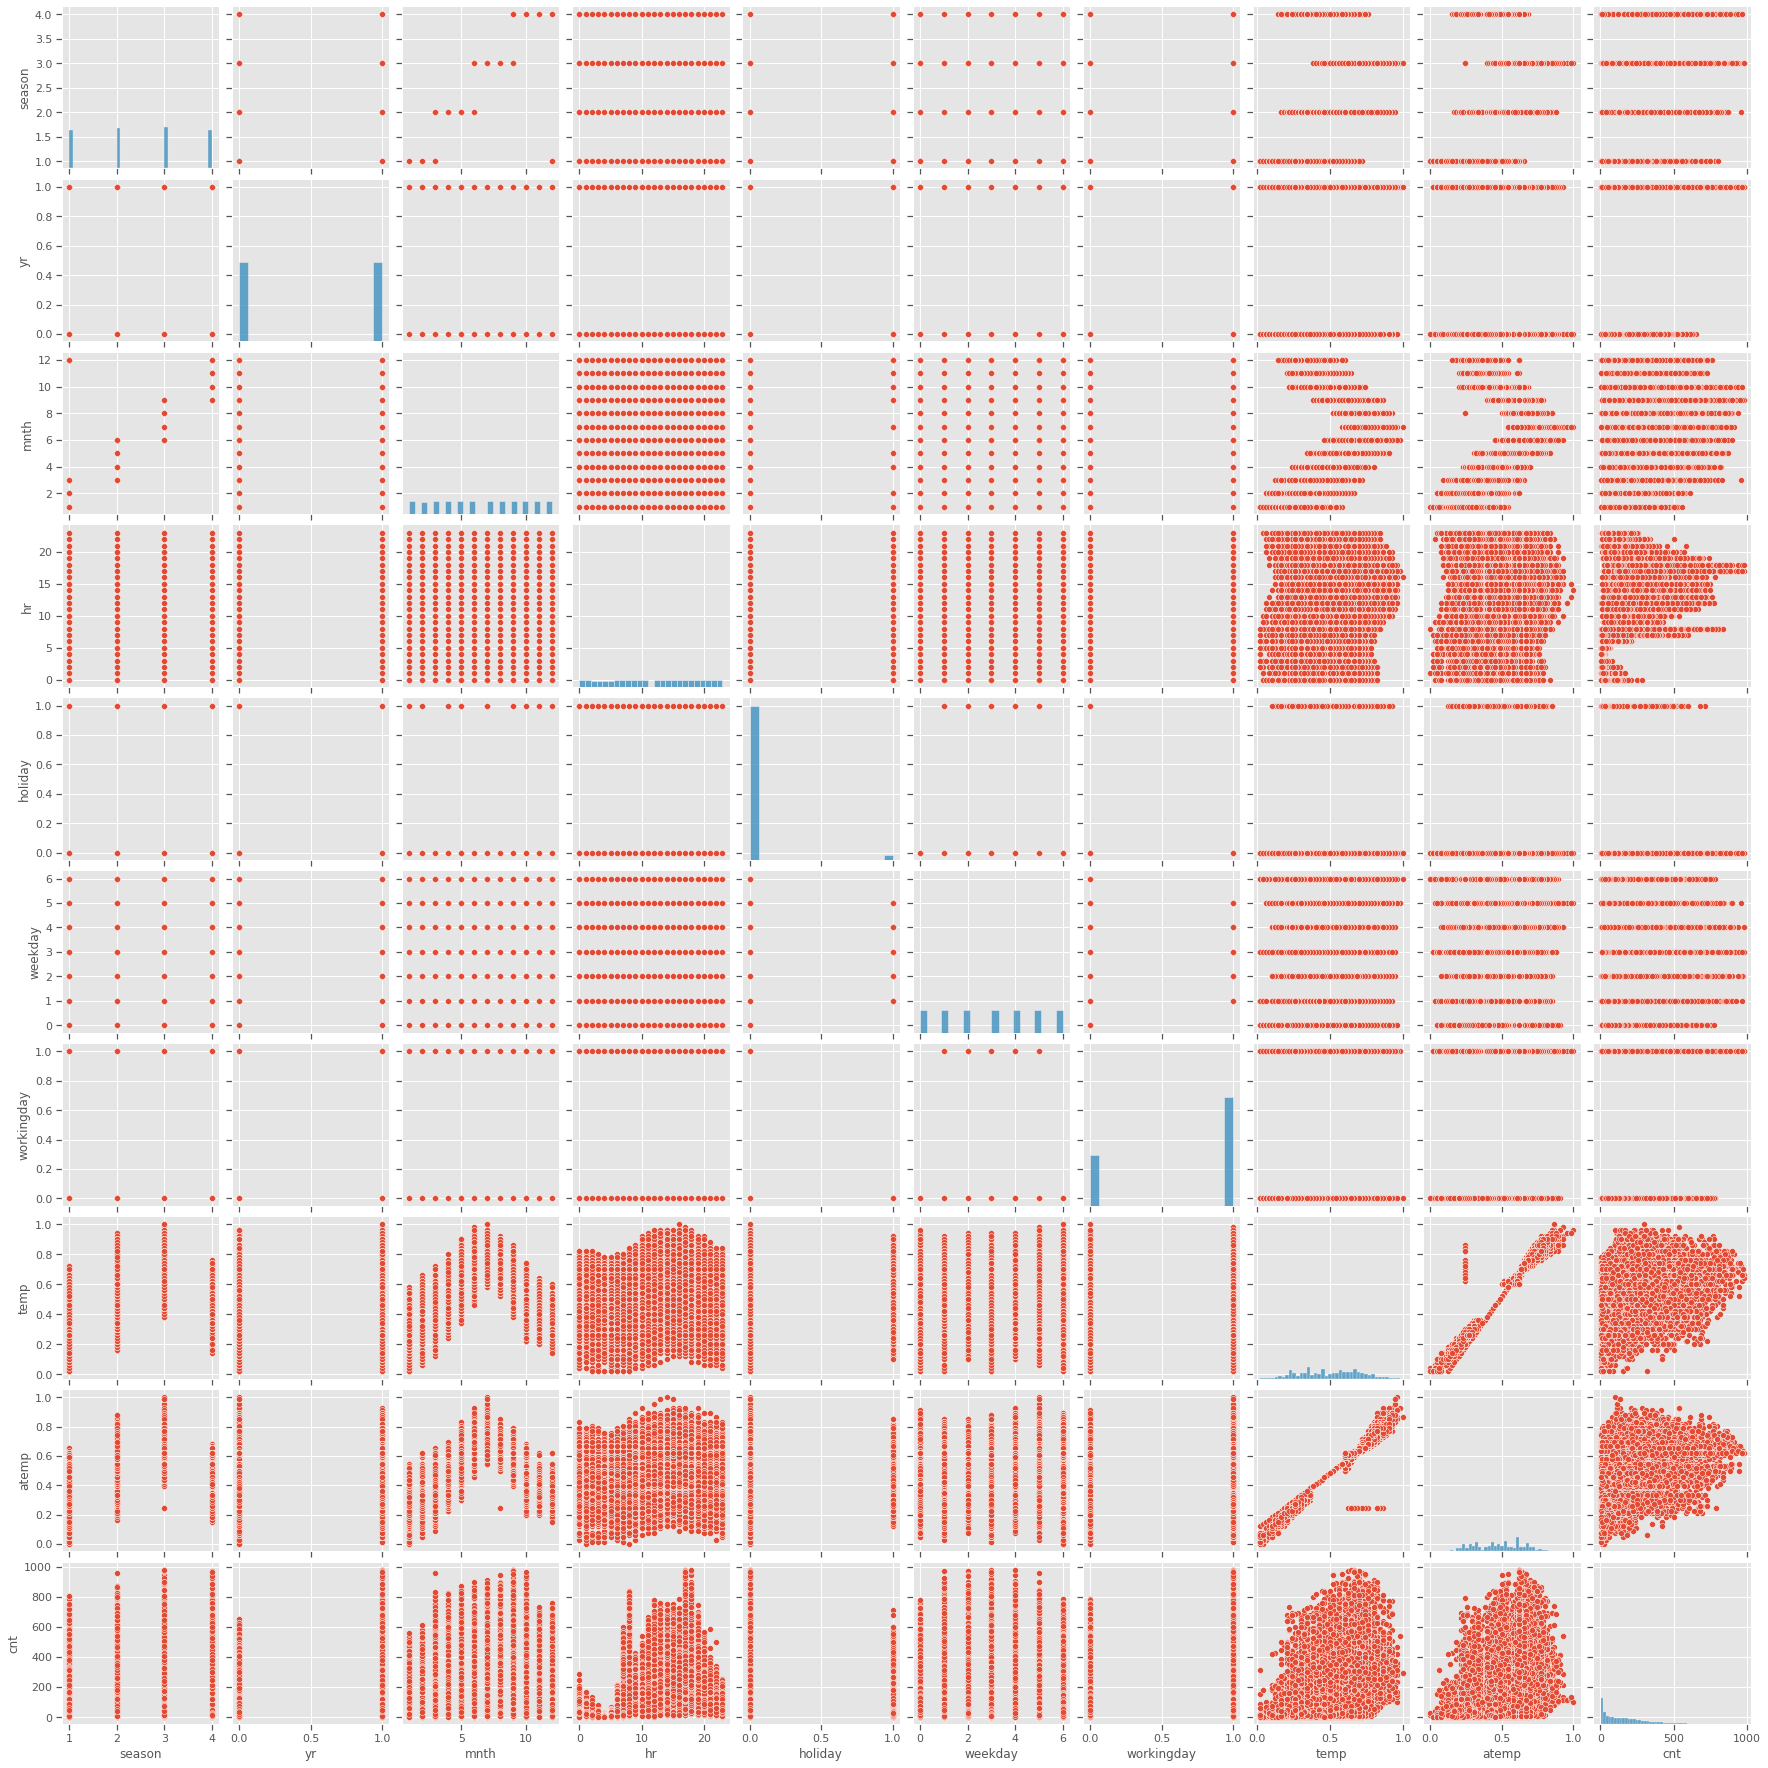

In [15]:
sns.pairplot(raw);

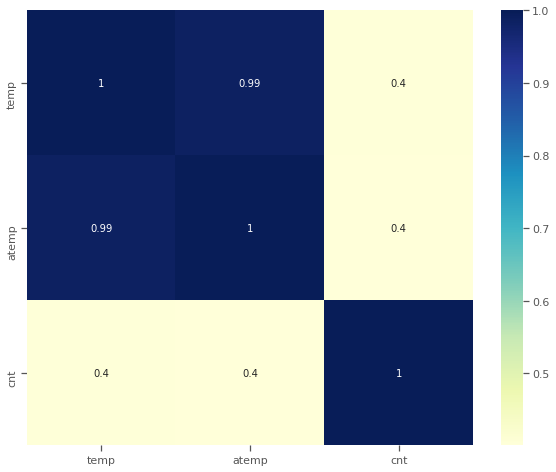

In [16]:
# Correlation matrix
# 'temp' and "normalized feeling temp" ('atemp') have a small positive correlation with the num of bikes rented but not as as much as expected
# Will drop 'atemp' because 'atemp' and 'temp' have a very strong correlation among themselves and this will cause multi-collinearity in the data if left
corrdata = raw[["temp","atemp","cnt"]]
corrmat = corrdata.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmat, annot = True, cmap= 'YlGnBu');

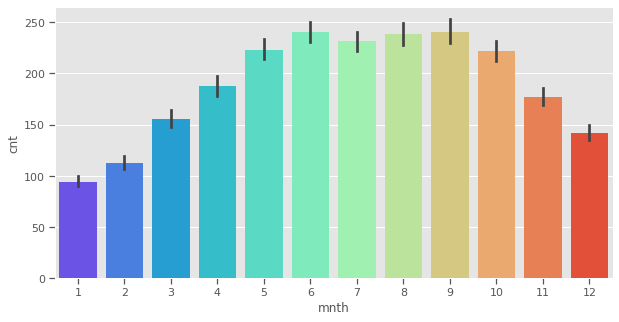

In [17]:
# Demand per month against the training dataset
display()
plt.figure(figsize=(10,5))
sns.barplot(data=raw, x='mnth', y = 'cnt', palette = 'rainbow');

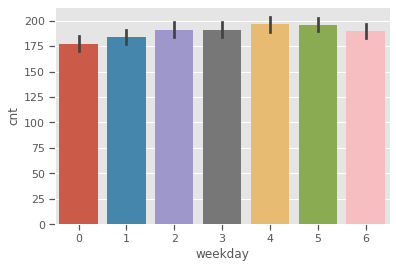

In [18]:
# Demand per weekday
plt.figure(figsize=(6,4))
sns.barplot(data = raw, x = 'weekday', y = 'cnt');

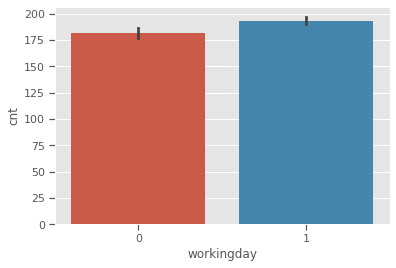

In [19]:
# Demand on working days, 0:no; not a working day (i.e = weekend or holiday) 1: yes- day is a working day; day is neither weekend nor holiday
plt.figure(figsize=(6,4))
sns.barplot(data = raw, x = 'workingday', y = 'cnt');

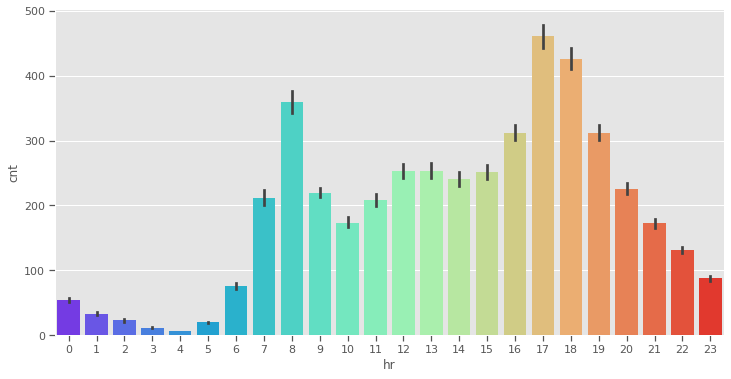

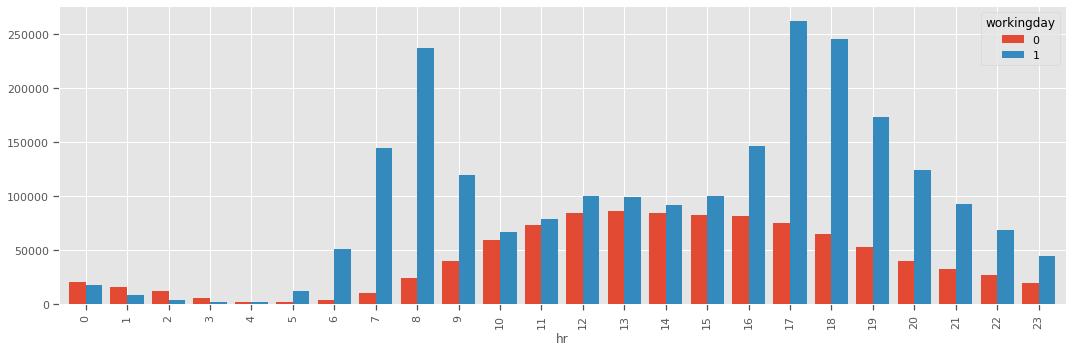

In [20]:
# Demand per hour
plt.figure(figsize=(12,6))
sns.barplot(data = raw, x = 'hr', y = 'cnt', palette = 'rainbow');

# rentals by hour, split by working day (or not)
by_hour = raw.copy().groupby(['hr', 'workingday'])['cnt'].agg('sum').unstack()
by_hour.plot(kind='bar', figsize=(15,5), width=0.8);
plt.grid(True)
plt.tight_layout();

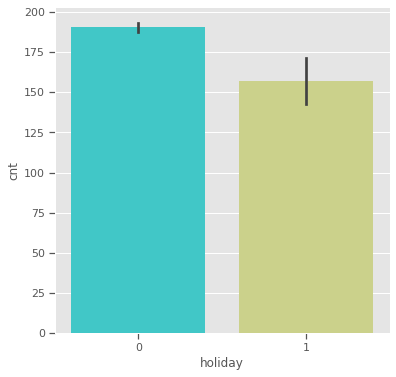

In [21]:
# Demand per holiday, 0:no, 1:yes
plt.figure(figsize=(6,6))
sns.barplot(data = raw, x = 'holiday', y = 'cnt', palette = 'rainbow');

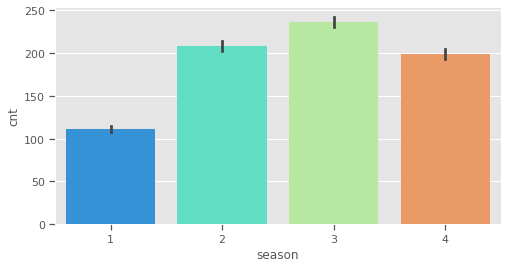

In [22]:
# Demand per season, 1:spring, 2:summer, 3:fall, 4:winter
plt.figure(figsize = (8,4))
sns.barplot(data = raw, x = 'season', y = 'cnt', palette = 'rainbow');

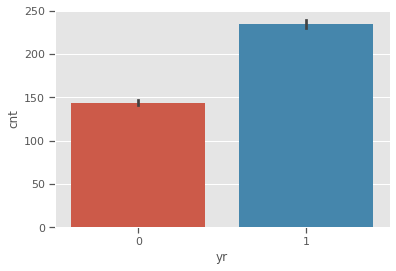

In [23]:
# Demand according to the year: year 1 or year 2
plt.figure(figsize=(6,4))
sns.barplot(data = raw, x = 'yr', y = 'cnt');

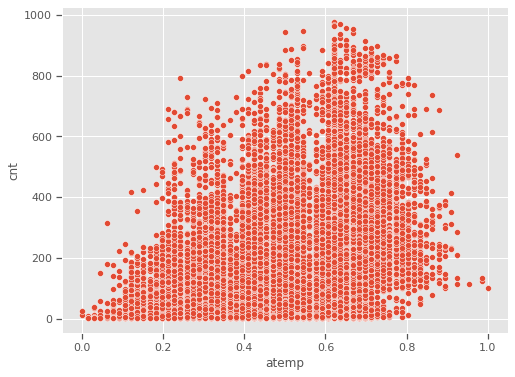

In [24]:
# Temperature vs demand
plt.figure(figsize=(8,6))
sns.scatterplot(data = raw, x = 'atemp', y = 'cnt');

In [25]:
# Model building
# Because features have already been extracted from 'dteday,' remove this variable and also 'yr'
# Drop atemp variable to remove redundant data
raw.drop(['dteday','atemp', 'yr'], axis=1, inplace=True)

In [26]:
raw.head()

,season,mnth,hr,holiday,weekday,workingday,temp,cnt
0,1,1,0,0,6,0,0.24,16
1,1,1,1,0,6,0,0.22,40
2,1,1,2,0,6,0,0.22,32
3,1,1,3,0,6,0,0.24,13
4,1,1,4,0,6,0,0.24,1


In [27]:
raw.tail()

,season,mnth,hr,holiday,weekday,workingday,temp,cnt
17374,1,12,19,0,1,1,0.26,119
17375,1,12,20,0,1,1,0.26,89
17376,1,12,21,0,1,1,0.26,90
17377,1,12,22,0,1,1,0.26,61
17378,1,12,23,0,1,1,0.26,49


In [28]:
# To improve the accuracy of the linear regression model,because this dataset is a combination of continuous and categorical data:
# Create dummy variables of the dataset
# Dummy variables are a numeric variable which represents the sub-categories or sub-groups of the categorical variables of the dataset
season = pd.get_dummies(raw['season'],prefix='season',drop_first=False)
holiday = pd.get_dummies(raw['holiday'],prefix='holiday',drop_first=False)
mnth = pd.get_dummies(raw['mnth'],prefix='mnth',drop_first=False)
hr = pd.get_dummies(raw['hr'],prefix='hr',drop_first=False)
data = pd.concat([raw,season,holiday,mnth,hr],axis=1)
data.drop(['season','holiday','mnth','hr'], axis=1,inplace=True)
data.head()

,weekday,workingday,temp,cnt,season_1,season_2,season_3,season_4,holiday_0,holiday_1,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,6,0,0.24,16,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,0.22,40,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0.22,32,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0.24,13,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0.24,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Create the x-array
x = data.drop('cnt',axis=1)

In [30]:
# Create the y-array
y = raw['cnt']

In [31]:
# Splitting the dataset into training data and test data
from sklearn.model_selection import train_test_split

In [32]:
# Test data will be 30% of entire dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [33]:
# The dataset has now been properly divided, now build and train the linear regression machine learning model
from sklearn.linear_model import LinearRegression

In [34]:
# Create instance of the Linear Regression object
model = LinearRegression()

In [35]:
# Train this model on the training data using scikit-learn's fit method
trainedModel = model.fit(x_train, y_train)


In [36]:
# The model has now been trained. Examine each of the model's coefficients
print(trainedModel.coef_)

[ 2.62378421e+00  2.39582171e+00  3.10726706e+02 -1.60412767e+13
 -1.60412767e+13 -1.60412767e+13 -1.60412767e+13  2.80132192e+13
  2.80132192e+13 -1.18131881e+13 -1.18131881e+13 -1.18131881e+13
 -1.18131881e+13 -1.18131881e+13 -1.18131881e+13 -1.18131881e+13
 -1.18131881e+13 -1.18131881e+13 -1.18131881e+13 -1.18131881e+13
 -1.18131881e+13 -2.58339285e+12 -2.58339285e+12 -2.58339285e+12
 -2.58339285e+12 -2.58339285e+12 -2.58339285e+12 -2.58339285e+12
 -2.58339285e+12 -2.58339285e+12 -2.58339285e+12 -2.58339285e+12
 -2.58339285e+12 -2.58339285e+12 -2.58339285e+12 -2.58339285e+12
 -2.58339285e+12 -2.58339285e+12 -2.58339285e+12 -2.58339285e+12
 -2.58339285e+12 -2.58339285e+12 -2.58339285e+12 -2.58339285e+12
 -2.58339285e+12]


In [37]:
# View the intercept of the regression equation
print(trainedModel.intercept_)

2424638475239.7637


In [38]:
# Place the coefficients in a DataFrame for easier viewing
# large coefficients on a variable mean that that variable has a large impact on the number of bikes rented that hour.
# Small values have small impact.
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
weekday,2.623784e+00
workingday,2.395822e+00
temp,3.107267e+02
season_1,-1.604128e+13
season_2,-1.604128e+13
season_3,-1.604128e+13
season_4,-1.604128e+13
holiday_0,2.801322e+13
holiday_1,2.801322e+13
mnth_1,-1.181319e+13


In [39]:
# Make prediction on the X_val set and check the performance of the model 
predictions = trainedModel.predict(x_test)

In [40]:
# View the predictions variable which holds the predicted values of 'cnt'
predictions

array([450.33984375, 227.9375    , -56.75488281, ..., 343.16503906,
        22.24267578, 258.90917969])

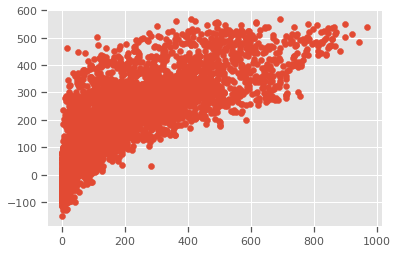

In [41]:
# Evaluating the regression
# Compare the values of the predictions array with the values of y-test
# The predicted values are close enough to the actual values for the observations in the data set. 
# A perfectly straight diagonal line in this scatterplot would indicate that the model perfectly predicted the y-array values.
plt.scatter(y_test, predictions)

(array([   5.,   56.,  226.,  715., 2114., 1414.,  377.,  175.,  107.,
          25.]),
 array([-447.6953125 , -355.78857422, -263.88183594, -171.97509766,
         -80.06835938,   11.83837891,  103.74511719,  195.65185547,
         287.55859375,  379.46533203,  471.37207031]),
 <BarContainer object of 10 artists>)

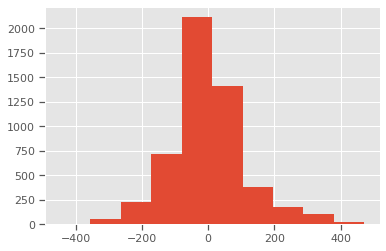

In [42]:
# Plot the residuals - which are the difference between the actual y-array values and the predicted y-array values
# The residuals from the machine learning model appear to be normally distributed well enough, which indicates this is an appropriate model type to make predictions 
plt.hist(y_test - predictions)

In [43]:
# Evaluate model with performance metrics used for regression machine learning models
from sklearn import metrics

In [44]:
# Mean Absolute Error (MAE)
metrics.mean_absolute_error(y_test, predictions)

83.13477395968187

In [45]:
# Mean Squared Error (MSE)
metrics.mean_squared_error(y_test, predictions)

12992.58586407828

In [46]:
# Root Mean Squared Error (RMSE) - calculates the simple square root of mean squared error
# Goal: to get a minimum RMSE because this is a loss
np.sqrt(metrics.mean_squared_error(y_test, predictions))

113.98502473605154

In [47]:
# R Squared (R2) - tells the performance of the model
# The model is capable to explain 60% of the variance of data
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print(r2)

0.6041642509846586


In [48]:
raw['cnt'].max()

977

In [49]:
# To allow users to request a day for a prediction of future bike availability
# Make dashboard start with tomorrow
import datetime

currentday = datetime.datetime.today()
print("today=", currentday)
tomorrow = datetime.datetime.today() + datetime.timedelta(days=1)
print("tomorrow=", tomorrow)

def get_months(day):
    month = day.month
    month_1= 0
    month_2 = 0
    month_3 = 0
    month_4 = 0
    month_5 = 0
    month_6 = 0
    month_7 = 0
    month_8 = 0
    month_9 = 0
    month_10 = 0
    month_11 = 0
    month_12 = 0
    if month == 1:
        month_1 = 1
    elif month == 2:
        month_2 = 1
    elif month == 3:
        month_3 = 1
    elif month == 4:
        month_4 = 1
    elif month == 5:
        month_5 = 1
    elif month == 6:
        month_6 = 1
    elif month == 7:
        month_7 = 1
    elif month == 8:
        month_8 = 1
    elif month == 9:
        month_9 = 1
    elif month == 10:
        month_10 = 1
    elif month == 11:
        month_11 = 1
    elif month == 12:
        month_12 = 1
    return month, month_1, month_2, month_3, month_4, month_5, month_6, month_7, month_8, month_9, month_10, month_11, month_12
    
        
mnths = get_months(tomorrow)

print(mnths)
month = mnths[0]
month_1 = mnths[1]
month_2 = mnths[2]
month_3 = mnths[3]
month_4 = mnths[4]
month_5 = mnths[5]
month_6 = mnths[6]
month_7 = mnths[7]
month_8 = mnths[8]
month_9 = mnths[9]
month_10 = mnths[10]
month_11 = mnths[11]
month_12 = mnths[12]
print("month=",month)
print("month9=",month_9)

today= 2021-09-09 17:00:15.762697
tomorrow= 2021-09-10 17:00:15.762697
(9, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0)
month= 9
month9= 1


In [50]:
Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('4', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('1', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('2', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('3', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('4', (date(Y, 12, 21),  date(Y, 12, 31)))]

tom = tomorrow.date()

def get_season(day):
    day = day.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= day <= end)

seasonout = get_season(tom) 

def set_seasons(season):
    if season == '1':
        season1 = 1
        season2 = 0
        season3 = 0
        season4 = 0
        return season1, season2, season3, season4
    elif season == '2':
        season1 = 0
        season2 = 1
        season3 = 0
        season4 = 0
        return season1, season2, season3, season4
    elif season == '3':
        season1 = 0
        season2 = 0
        season3 = 1
        season4 = 0
        return season1, season2, season3, season4
    elif season == '4':
        season1 = 0
        season2 = 0
        season3 = 0
        season4 = 1
        return season1, season2, season3, season4
    else:
        print('Something wrong happened.')
        
seasonsset = set_seasons(seasonout)
print(seasonsset)

season1 = seasonsset[0]
season2 = seasonsset[1]
season3 = seasonsset[2]
season4 = seasonsset[3]
print(season2)

(0, 1, 0, 0)
1


In [51]:
import holidays
us_holidays = holidays.UnitedStates()
# Print all the holidays in UnitedKingdom in year 2018
for ptr in holidays.UnitedStates(years = 2020).items():
    print(ptr)
    
print(tomorrow in us_holidays)

def get_holiday(day):
    status = day in us_holidays
    if status == True:
        holiday = 1
    elif status == False:
        holiday = 0
    return holiday

holidayout = get_holiday(tomorrow)
print(holidayout)

def set_holidays(holiday):
    if holidayout == 1:
        holiday_0 = 0
        holiday_1 = 1
    elif holidayout == 0:
        holiday_0 = 1
        holiday_1 = 0
    else:
        print('Something wrong happened.')
    return holiday_0, holiday_1

holidaysset = set_holidays(holidayout)
holiday_0 = holidaysset[0]
holiday_1 = holidaysset[1]

print(holidaysset)
print("holiday0=", holiday_0)
print("holiday1=", holiday_1)

(datetime.date(2020, 1, 1), "New Year's Day")
(datetime.date(2020, 1, 20), 'Martin Luther King Jr. Day')
(datetime.date(2020, 2, 17), "Washington's Birthday")
(datetime.date(2020, 5, 25), 'Memorial Day')
(datetime.date(2020, 7, 4), 'Independence Day')
(datetime.date(2020, 7, 3), 'Independence Day (Observed)')
(datetime.date(2020, 9, 7), 'Labor Day')
(datetime.date(2020, 10, 12), 'Columbus Day')
(datetime.date(2020, 11, 11), 'Veterans Day')
(datetime.date(2020, 11, 26), 'Thanksgiving')
(datetime.date(2020, 12, 25), 'Christmas Day')
False
0
(1, 0)
holiday0= 1
holiday1= 0


In [52]:
def get_day_of_week(day):
    day_of_week = day.weekday()
    return day_of_week

day_of_week = get_day_of_week(tomorrow)

print("day of the week=", day_of_week)

day of the week= 4


In [53]:
def get_workingday(day):
    daynum = day.weekday()
    if get_holiday(day) == True or daynum == 5 or daynum == 6:
        workday = 1
    else:
        workday = 0
    return workday

workday = get_workingday(tomorrow)
print("working day =", workday)

working day = 0


In [54]:
avgtemp = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.5, 0.5, 0.6, 0.7, 0.7, 0.7, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4]
cnt = 0

userout = {'weekday': day_of_week,
           'workingday': workday,
           'temp': avgtemp,
           'season': seasonout,
           'holiday': holidayout,         
           'mnth': month,
           'hr': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
          }

user_out = pd.DataFrame (userout, columns = ['weekday', 'workingday', 'temp','season','holiday', 'mnth','hr'])

print(user_out)

    weekday  workingday  temp season  holiday  mnth  hr
0         4           0   0.3      2        0     9   0
1         4           0   0.3      2        0     9   1
2         4           0   0.3      2        0     9   2
3         4           0   0.3      2        0     9   3
4         4           0   0.3      2        0     9   4
5         4           0   0.3      2        0     9   5
6         4           0   0.4      2        0     9   6
7         4           0   0.4      2        0     9   7
8         4           0   0.4      2        0     9   8
9         4           0   0.5      2        0     9   9
10        4           0   0.5      2        0     9  10
11        4           0   0.6      2        0     9  11
12        4           0   0.7      2        0     9  12
13        4           0   0.7      2        0     9  13
14        4           0   0.7      2        0     9  14
15        4           0   0.6      2        0     9  15
16        4           0   0.6      2        0   

In [55]:
cnt = 0

user = {'weekday': day_of_week,
        'workingday': workday,
        'temp': avgtemp,
        'season_1': season1,
        'season_2': season2,
        'season_3': season3,
        'season_4': season4,
        'holiday_0': holiday_0,
        'holiday_1': holiday_1,
        'mnth_1': month_1,
        'mnth_2': month_2,
        'mnth_3': month_3,
        'mnth_4': month_4,
        'mnth_5': month_5,
        'mnth_6': month_6,
        'mnth_7': month_7,
        'mnth_8': month_8,
        'mnth_9': month_9,
        'mnth_10': month_10,
        'mnth_11': month_11,
        'mnth_12': month_12,
        'hr': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
        'cnt' : cnt
        }

user_predictions = pd.DataFrame (user, columns = ['weekday', 'workingday', 'temp','season_1', 'season_2', 'season_3', 'season_4','holiday_0', 'holiday_1','mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12','hr', 'cnt'])

print(user_predictions)

    weekday  workingday  temp  season_1  season_2  season_3  season_4  \
0         4           0   0.3         0         1         0         0   
1         4           0   0.3         0         1         0         0   
2         4           0   0.3         0         1         0         0   
3         4           0   0.3         0         1         0         0   
4         4           0   0.3         0         1         0         0   
5         4           0   0.3         0         1         0         0   
6         4           0   0.4         0         1         0         0   
7         4           0   0.4         0         1         0         0   
8         4           0   0.4         0         1         0         0   
9         4           0   0.5         0         1         0         0   
10        4           0   0.5         0         1         0         0   
11        4           0   0.6         0         1         0         0   
12        4           0   0.7         0         1  

In [56]:
# Validate that the user dataset created below has the same number of rows as the the dataset used to train the model
data1 = data[data.index == "Rocinante"]
data1.head()

,weekday,workingday,temp,cnt,season_1,season_2,season_3,season_4,holiday_0,holiday_1,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23


In [57]:
# Create dummy variables of the user dataset
hr = pd.get_dummies(user_predictions['hr'],prefix='hr',drop_first=False)
data1 = pd.concat([user_predictions,hr],axis=1)
data1.drop(['hr'], axis=1,inplace=True)
print(data1)

    weekday  workingday  temp  season_1  season_2  season_3  season_4  \
0         4           0   0.3         0         1         0         0   
1         4           0   0.3         0         1         0         0   
2         4           0   0.3         0         1         0         0   
3         4           0   0.3         0         1         0         0   
4         4           0   0.3         0         1         0         0   
5         4           0   0.3         0         1         0         0   
6         4           0   0.4         0         1         0         0   
7         4           0   0.4         0         1         0         0   
8         4           0   0.4         0         1         0         0   
9         4           0   0.5         0         1         0         0   
10        4           0   0.5         0         1         0         0   
11        4           0   0.6         0         1         0         0   
12        4           0   0.7         0         1  

In [58]:
# Predict the number of bikes rented per hour tomorrow
# Create the x-array
x2 = data1.drop('cnt',axis=1)
print(x2)

    weekday  workingday  temp  season_1  season_2  season_3  season_4  \
0         4           0   0.3         0         1         0         0   
1         4           0   0.3         0         1         0         0   
2         4           0   0.3         0         1         0         0   
3         4           0   0.3         0         1         0         0   
4         4           0   0.3         0         1         0         0   
5         4           0   0.3         0         1         0         0   
6         4           0   0.4         0         1         0         0   
7         4           0   0.4         0         1         0         0   
8         4           0   0.4         0         1         0         0   
9         4           0   0.5         0         1         0         0   
10        4           0   0.5         0         1         0         0   
11        4           0   0.6         0         1         0         0   
12        4           0   0.7         0         1  

In [59]:
# Make prediction on the x values 
predictions2 = trainedModel.predict(x2)

In [60]:
# View the predictions variable which holds the predicted values of 'cnt'
predictions2

array([ 1.90644531e+01, -4.72656250e-01, -1.00966797e+01, -1.74760742e+01,
       -2.54658203e+01, -6.31933594e+00,  8.26582031e+01,  2.22522949e+02,
        3.57674805e+02,  2.42663574e+02,  1.92933105e+02,  2.53328125e+02,
        3.15002930e+02,  3.18579590e+02,  3.00698730e+02,  2.78004883e+02,
        3.37196289e+02,  4.93964844e+02,  4.25929688e+02,  3.17660645e+02,
        2.44097656e+02,  1.60838379e+02,  1.23361328e+02,  8.32133789e+01])

In [61]:
user_out.insert(7, "bikes_rented", predictions2)
print(user_out)

    weekday  workingday  temp season  holiday  mnth  hr  bikes_rented
0         4           0   0.3      2        0     9   0     19.064453
1         4           0   0.3      2        0     9   1     -0.472656
2         4           0   0.3      2        0     9   2    -10.096680
3         4           0   0.3      2        0     9   3    -17.476074
4         4           0   0.3      2        0     9   4    -25.465820
5         4           0   0.3      2        0     9   5     -6.319336
6         4           0   0.4      2        0     9   6     82.658203
7         4           0   0.4      2        0     9   7    222.522949
8         4           0   0.4      2        0     9   8    357.674805
9         4           0   0.5      2        0     9   9    242.663574
10        4           0   0.5      2        0     9  10    192.933105
11        4           0   0.6      2        0     9  11    253.328125
12        4           0   0.7      2        0     9  12    315.002930
13        4         

In [62]:
# Predict the number of bikes rented each hour on the day the user chose with pre-supplied average temps 
import calendar

def get_day_prediction(day):
    months = get_months(day)
    month = months[0]
    month_1 = months[1]
    month_2 = months[2]
    month_3 = months[3]
    month_4 = months[4]
    month_5 = months[5]
    month_6 = months[6]
    month_7 = months[7]
    month_8 = months[8]
    month_9 = months[9]
    month_10 = months[10]
    month_11 = months[11]
    month_12 = months[12]
    season = get_season(day)
    seasons = set_seasons(season)
    season1 = seasons[0]
    season2 = seasons[1]
    season3 = seasons[2]
    season4 = seasons[3]
    holiday = get_holiday(day)
    holidays = set_holidays(holiday)
    holiday_0 = holidays[0]
    holiday_1 = holidays[1]
    day_of_week = get_day_of_week(day)
    workingday = get_workingday(day)
    cnt = 0
    
    user_out.weekday = day_of_week
    user_out.workingday = workingday
    user_out.season = season
    user_out.holiday = holiday         
    user_out.mnth =  month
    
    user_predictions.weekday = day_of_week
    user_predictions.workingday = workingday
    user_predictions.season_1 = season1
    user_predictions.season_2 = season2
    user_predictions.season_3 = season3
    user_predictions.season_4 = season4
    user_predictions.holiday_0 = holiday_0
    user_predictions.holiday_1 = holiday_1
    user_predictions.mnth_1 = month_1
    user_predictions.mnth_2 = month_2
    user_predictions.mnth_3 = month_3
    user_predictions.mnth_4 = month_4
    user_predictions.mnth_5 = month_5
    user_predictions.mnth_6 = month_6
    user_predictions.mnth_7 = month_7
    user_predictions.mnth_8 = month_8
    user_predictions.mnth_9 = month_9
    user_predictions.mnth_10 = month_10
    user_predictions.mnth_11 = month_11
    user_predictions.mnth_12 = month_12

    # Create dummy variables of the user dataset
    hr = pd.get_dummies(user_predictions['hr'],prefix='hr',drop_first=False)
    data1 = pd.concat([user_predictions,hr],axis=1)
    data1.drop(['hr'], axis=1,inplace=True)
    x3 = data1.drop('cnt',axis=1)
    
    predictions = trainedModel.predict(x3)
    user_out.bikes_rented = predictions
    
    user_out['mnth'] = user_out['mnth'].apply(lambda x: calendar.month_abbr[x])
    wdi = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
    user_out["weekday"].replace(wdi, inplace=True)
    sdi = {"1":"spring", "2":"summer", "3":"fall", "4":"winter"}
    user_out["season"].replace(sdi, inplace=True)
    di = {1: "no", 0: "yes"}
    user_out["workingday"].replace(di, inplace=True)
    di2 = {1: "yes", 0: "no"}
    user_out["holiday"].replace(di2, inplace=True)
    print(user_out[['mnth', 'weekday','season','workingday','holiday', 'hr', 'bikes_rented']])
    
# Demand per hour
# Negative numbers can be assumed to = 0 bikes rented for that hour

    dt = day.strftime("%B %d, %Y")

    plt.figure(figsize=(12,6))
    plt.ylim(0, 700)
    sns.barplot(data = user_out, x = 'hr', y = 'bikes_rented', palette = 'rainbow').set(title= dt)
    

In [63]:
# Predict the number of bikes rented each hour on the day and for the temp the user chose
def get_tmp_prediction(day, temp):
    months = get_months(day)
    month = months[0]
    month_1 = months[1]
    month_2 = months[2]
    month_3 = months[3]
    month_4 = months[4]
    month_5 = months[5]
    month_6 = months[6]
    month_7 = months[7]
    month_8 = months[8]
    month_9 = months[9]
    month_10 = months[10]
    month_11 = months[11]
    month_12 = months[12]
    season = get_season(day)
    seasons = set_seasons(season)
    season1 = seasons[0]
    season2 = seasons[1]
    season3 = seasons[2]
    season4 = seasons[3]
    holiday = get_holiday(day)
    holidays = set_holidays(holiday)
    holiday_0 = holidays[0]
    holiday_1 = holidays[1]
    day_of_week = get_day_of_week(day)
    workingday = get_workingday(day)
    cnt = 0
    
    user_out.weekday = day_of_week
    user_out.workingday = workingday
    user_out.season = season
    user_out.holiday = holiday         
    user_out.mnth =  month
    user_out.temp =  temp
    
    user_predictions.weekday = day_of_week
    user_predictions.workingday = workingday
    user_predictions.season_1 = season1
    user_predictions.season_2 = season2
    user_predictions.season_3 = season3
    user_predictions.season_4 = season4
    user_predictions.holiday_0 = holiday_0
    user_predictions.holiday_1 = holiday_1
    user_predictions.temp = temp
    user_predictions.mnth_1 = month_1
    user_predictions.mnth_2 = month_2
    user_predictions.mnth_3 = month_3
    user_predictions.mnth_4 = month_4
    user_predictions.mnth_5 = month_5
    user_predictions.mnth_6 = month_6
    user_predictions.mnth_7 = month_7
    user_predictions.mnth_8 = month_8
    user_predictions.mnth_9 = month_9
    user_predictions.mnth_10 = month_10
    user_predictions.mnth_11 = month_11
    user_predictions.mnth_12 = month_12

    # Create dummy variables of the user dataset
    hr = pd.get_dummies(user_predictions['hr'],prefix='hr',drop_first=False)
    data1 = pd.concat([user_predictions,hr],axis=1)
    data1.drop(['hr'], axis=1,inplace=True)
    x4 = data1.drop('cnt',axis=1)
    
    predictions = trainedModel.predict(x4)
    user_out.bikes_rented = predictions
    
    user_out['mnth'] = user_out['mnth'].apply(lambda x: calendar.month_abbr[x])
    wdi = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
    user_out["weekday"].replace(wdi, inplace=True)
    sdi = {"1":"spring", "2":"summer", "3":"fall", "4":"winter"}
    user_out["season"].replace(sdi, inplace=True)
    di = {1: "no", 0: "yes"}
    user_out["workingday"].replace(di, inplace=True)
    di2 = {1: "yes", 0: "no"}
    user_out["holiday"].replace(di2, inplace=True)
    
    print(user_out[['mnth', 'weekday', 'temp','season','workingday','holiday', 'hr', 'bikes_rented']])
    
    # Demand per hour
    # Negative numbers can be assumed to = 0 bikes rented for that hour

    dt = day.strftime("%B %d, %Y")

    plt.figure(figsize=(12,6))
    plt.ylim(0, 700)
    sns.barplot(data = user_out, x = 'hr', y = 'bikes_rented', palette = 'rainbow').set(title= dt)
    

In [64]:
# Predict the number of bikes rented during the hour of user's choice for each temperature in range 0.0 - 1.0 C, predicted in 0.2 increments
def get_hr_prediction(dy, hr):
    hour = hr
    day = dy
    df = pd.DataFrame()
    
    months = get_months(day)
    month = months[0]
    month_1 = months[1]
    month_2 = months[2]
    month_3 = months[3]
    month_4 = months[4]
    month_5 = months[5]
    month_6 = months[6]
    month_7 = months[7]
    month_8 = months[8]
    month_9 = months[9]
    month_10 = months[10]
    month_11 = months[11]
    month_12 = months[12]
    season = get_season(day)
    seasons = set_seasons(season)
    season1 = seasons[0]
    season2 = seasons[1]
    season3 = seasons[2]
    season4 = seasons[3]
    holiday = get_holiday(day)
    holidays = set_holidays(holiday)
    holiday_0 = holidays[0]
    holiday_1 = holidays[1]
    day_of_week = get_day_of_week(day)
    workingday = get_workingday(day)
    cnt = 0
    
    user_out.weekday = day_of_week
    user_out.workingday = workingday
    user_out.season = season
    user_out.holiday = holiday         
    user_out.mnth =  month
    
    user_predictions.weekday = day_of_week
    user_predictions.workingday = workingday
    user_predictions.season_1 = season1
    user_predictions.season_2 = season2
    user_predictions.season_3 = season3
    user_predictions.season_4 = season4
    user_predictions.holiday_0 = holiday_0
    user_predictions.holiday_1 = holiday_1
    user_predictions.mnth_1 = month_1
    user_predictions.mnth_2 = month_2
    user_predictions.mnth_3 = month_3
    user_predictions.mnth_4 = month_4
    user_predictions.mnth_5 = month_5
    user_predictions.mnth_6 = month_6
    user_predictions.mnth_7 = month_7
    user_predictions.mnth_8 = month_8
    user_predictions.mnth_9 = month_9
    user_predictions.mnth_10 = month_10
    user_predictions.mnth_11 = month_11
    user_predictions.mnth_12 = month_12
    
    # Create dummy variables of the user dataset
    hourd = pd.get_dummies(user_predictions['hr'],prefix='hr',drop_first=False)
    
    temp = 0.0
    
    for t in range(0, 12, 2):
        user_out.temp =  temp
    
        user_predictions.temp = temp
        
        data1 = pd.concat([user_predictions,hourd],axis=1)
        data1.drop(['hr'], axis=1,inplace=True)
        x5 = data1.drop('cnt',axis=1)
        
        predictions = trainedModel.predict(x5)
        user_out.bikes_rented = predictions
        
        df = pd.concat([df, user_out]) 
        
        temp = temp + 0.2
    
    indexNames = df[df['hr'] != hour].index
    df.drop(indexNames, inplace=True)
    df['mnth'] =  df['mnth'].apply(lambda x: calendar.month_abbr[x])
    wdi = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
    df["weekday"].replace(wdi, inplace=True)
    
    print(df[['mnth','weekday','hr', 'temp', 'bikes_rented']])
    
    dt = day.strftime("%B %d, %Y")
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot()
    ax.plot(df.temp,  df.bikes_rented)
    ax.set_xlabel("temp in Celsius")
    ax.set_ylabel("bikes rented")
    ax.set_title("Hour: " + str(hour))
    

In [65]:
# Make the dashboard interactive and allow users to query for wanted information
# Request a date from the user for the day they would like to check bike availability
from ipywidgets import DOMWidget, ValueWidget, register, interact, interactive, fixed, interact_manual, Layout
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots
from IPython.display import display, clear_output
import ipywidgets as widgets

tom = tomorrow.date()

day_picked = widgets.DatePicker(
    description='Pick a Date',
    disabled=False,
    value = tom
)

def f(daypicked):
    print('Date Chosen: {}'.format(daypicked))

out1 = widgets.interactive_output(f, {'daypicked': day_picked})

widgets.HBox([widgets.VBox([day_picked]), out1])


In [66]:
# Demand per hour on a day user has chosen with pre-supplied average temps
# Negative numbers can be assumed to = 0 bikes rented for that hour
from IPython.display import display

daypicked = day_picked.value

button1 = widgets.Button(description="View Predictions")
output1 = widgets.Output()

display(button1, output1)

def on_button_clicked1(b):
    with output1:
        clear_output()
        daypicked = day_picked.value
        get_day_prediction(daypicked)
        show_inline_matplotlib_plots()

button1.on_click(on_button_clicked1)


Button(description='View Predictions', style=ButtonStyle())

Output()

In [67]:
# Allow the user to pick an hour to adjust the temperature settings for 
hr_picked = widgets.Dropdown(
    options=['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
    value='12',
    description='Pick an Hour:',
    disabled=False,
)

def h(hrpicked):
    print('Hour Chosen: {}'.format(hrpicked))

out2 = widgets.interactive_output(h, {'hrpicked': hr_picked})

widgets.HBox([widgets.VBox([hr_picked]), out2])

In [68]:
hrpicked = int(hr_picked.value)
print(hrpicked)

tmpvl = user_out["temp"].iloc[hrpicked]
    
print(tmpvl)

12
0.7


In [69]:
# Allow the user to adjust the temperature to see how changes in temperature affect bike availability 
temp_picked = widgets.FloatSlider(
    value=tmpvl,
    min=0.0,
    max=1.0,
    step=0.1,
    description='Temp Celsius',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

def t(tmppicked):
    print('Temperature Chosen: {}'.format(tmppicked))

out3 = widgets.interactive_output(t, {'tmppicked': temp_picked})

widgets.HBox([widgets.VBox([temp_picked]), out3])




In [70]:
# View how a specific temperature affects bike availability for every hour during day 
button2 = widgets.Button(description="View Predictions")
output2 = widgets.Output()

display(button2, output2)

def on_button_clicked2(b):
    with output2:
        clear_output()
        daypicked = day_picked.value
        temppicked = temp_picked.value
        get_tmp_prediction(daypicked, temppicked)
        show_inline_matplotlib_plots()

button2.on_click(on_button_clicked2)


Button(description='View Predictions', style=ButtonStyle())

Output()

In [71]:
# View how the bike availability at a specfic hour changes as the temperature changes 
button3 = widgets.Button(description="View Predictions")
out3 = widgets.Output()

display(button3, out3)

def on_button_clicked3(b):
    with out3:
        clear_output()
        hrpicked = int(hr_picked.value)
        daypicked = day_picked.value
        get_hr_prediction(daypicked, hrpicked)
        show_inline_matplotlib_plots()

button3.on_click(on_button_clicked3)


Button(description='View Predictions', style=ButtonStyle())

Output()